In [1]:
# load initial required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# load in the dataframes and start initial exploration
data = pd.read_csv('./data/data.csv')
genre_data = pd.read_csv('./data/data_by_genres.csv')
year_data = pd.read_csv('./data/data_by_year.csv')

# check out the first few elements
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
# statistics for all columns
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [4]:
# from inspection, we likely won't want 'id' or 'mode' for training
# for now, the rest of the features seem fine. Here are all the columns:
# data = data.drop(['id', 'mode'], axis=1)
data.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [5]:
# take a look at what the genre csv data has
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [6]:
# let's take a look at all the unique genres. Check out genres.txt for the output.
with open("genres.txt", 'w') as f:
    f.write("\n".join([genre for genre in genre_data["genres"]]))

In [7]:
# look at year data too
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [8]:
# exploration: run this cell to see if we can constrain the knn search to only be genres of the song we have.
data_by_artist = pd.read_csv('./data/data_by_artist.csv')
data_by_genres = pd.read_csv('./data/data_by_genres.csv')
data_by_year = pd.read_csv('./data/data_by_year.csv')
data_w_genres = pd.read_csv('./data/data_w_genres.csv')
main_data = pd.read_csv('./data/data.csv')

# doesn't seem like we can get the genres of a sonng since no genre data is here :(
print(f'{data_by_artist.columns = }\n')
print(f'{data_by_genres.columns = }\n')
print(f'{data_by_year.columns = }\n')
print(f'{data_w_genres.columns = }\n')
print(f'{main_data.columns = }\n')

data_by_artist.columns = Index(['mode', 'count', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'key'],
      dtype='object')

data_by_genres.columns = Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key'],
      dtype='object')

data_by_year.columns = Index(['mode', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key'],
      dtype='object')

data_w_genres.columns = Index(['genres', 'artists', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key', 'mode', 'count'],
      dtype='objec

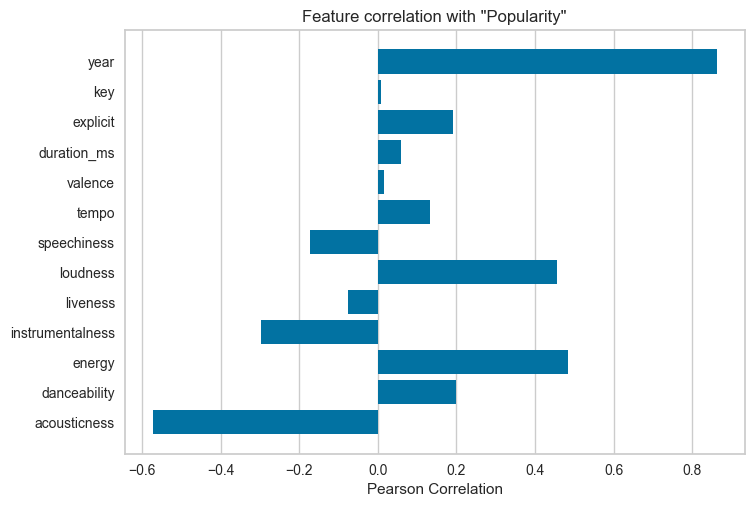

<Axes: title={'center': 'Feature correlation with "Popularity"'}, xlabel='Pearson Correlation'>

In [9]:
# visualization of which features correlate to "popularity" in the data and how much
# inspired by the kaggle page from which I got the data
from yellowbrick.target import FeatureCorrelation
features = ['acousticness', 'danceability', 'energy', 'instrumentalness','liveness', 
            'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','year']

X = data[features]
y = data['popularity']

# see which features correlate with the "popularity" column the most
visualizer = FeatureCorrelation(labels=features, title='Feature correlation with "Popularity"')
visualizer.fit(X, y)
visualizer.show()


#### We can see "year," "loudness," and "energy" have high positive pearson correlations with "popularity". Meanwhile, "acousticness" and "instrumentalness" have negative correlation.

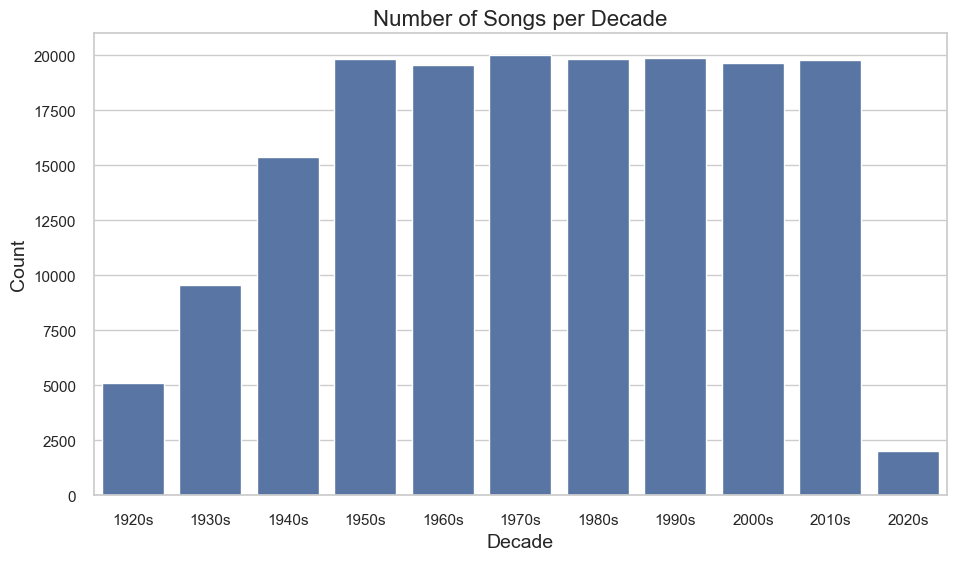

In [10]:
# checking how many songs are per decade in the dataset
# add a new 'decade' column then plot how many songs are per decade w/ seaborn
data['decade'] = data['year'].apply(lambda year: f'{year//10 * 10}s')

sns.set(style="whitegrid", rc={'figure.figsize':(11, 6)})
ax = sns.countplot(data=data, x='decade')
ax.set_title('Number of Songs per Decade', fontsize=16)
ax.set_xlabel('Decade', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

#### Looks like the song counts are distributed mostly evenly across decades. The 2020s being the lowest makes sense because the dataset was added in 2021, only 1 year into the current decade.

In [11]:
# Visualize how the important features of songs change as time passes
# inspired by Kaggle
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.update_layout(
    title='Sound Features Over the Years',
    xaxis_title='Year',
    yaxis_title='Value',
    template='plotly_dark',
)
fig.show()

#### Acousticness and instrumentalness have sharply declined and have remained low since the 1980s. Over time, music has trended to be higher energy, which is clear when we look at today's Top hits consisting of pop, rap, and similar genres.

In [12]:
# next, we'll look at some of the most popular genres and their features
n = 15
most_popular_genres = genre_data.nlargest(n, 'popularity')
print(f'{len(genre_data["genres"].unique())} Unique genres in data, top {n} most popular:')
print(most_popular_genres['genres'].to_numpy())
fig = px.bar(
    most_popular_genres, 
    x='genres', 
    y=['valence', 'danceability', 'energy', 'instrumentalness'], 
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.Dark2,
    title=f'Features of the Top {n} Most Popular Genres',
    labels={'value': 'Feature Value', 'variable': 'Feature', 'genres': 'Genre'},
    template='plotly_dark',
)
fig.show()

2973 Unique genres in data, top 15 most popular:
['basshall' 'south african house' 'trap venezolano' 'turkish edm'
 'alberta hip hop' 'chinese electropop' 'afroswing' 'afro soul' 'circuit'
 'guaracha' 'indie triste' 'russian dance' 'uk diy punk' 'pagode baiano'
 'ritmo kombina']


#### As expected, the most popular genres have high energy and danceability. However, I will say I don't recognize any of these genres really. This this seems like a peculiar aspect of the dataset and may be due to the sheer number of genres. Regardless, these ones have the most "popular" features.

In [13]:
from sklearn.preprocessing import MinMaxScaler

# normalize all our columns before using KNN so they contribute to the distance function equally
knn_features = data[['valence', 'acousticness', 'danceability', 'energy', 
                         'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']]
scaler = MinMaxScaler()
normalized_knn_features = scaler.fit_transform(knn_features)

In [14]:
from models.my_k_neighbors_classifier import MyKNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=7)
knn.fit(normalized_knn_features)

NearestNeighbors(n_neighbors=7)

In [15]:
pedal_point_blues_index = 45000
normalized_knn_features[pedal_point_blues_index]

array([7.01000000e-01, 3.58433735e-01, 3.92712551e-01, 3.49000000e-01,
       2.60000000e-04, 2.09000000e-01, 6.41578576e-01, 6.90721649e-02,
       8.44977762e-01])

In [16]:
# test it out! this is a jazz-like song in the data, at index 45,000
import ast
pedal_point_blues_index = 45000
sklearn_distances, sklearn_indices = knn.kneighbors([normalized_knn_features[pedal_point_blues_index]])

sklearn_similar_songs = sklearn_indices[0][1:]
sklearn_recommended_songs = data.iloc[sklearn_similar_songs]

# print the recommended song names and their artists
input_song_name = sklearn_recommended_songs['name'].iloc[0]
input_song_artist = ast.literal_eval(sklearn_recommended_songs['artists'].iloc[0])[0]
print(f'Input Song: {input_song_name} by {input_song_artist}')
print('sklearn Recommended Songs:')
for index in range(1, len(sklearn_recommended_songs)):
    song_name = sklearn_recommended_songs['name'].iloc[index]
    artist = ast.literal_eval(sklearn_recommended_songs['artists'].iloc[index])[0]
    print(f'{index}. {song_name} by {artist}')


Input Song: Pedal Point Blues by Charles Mingus
sklearn Recommended Songs:
1. Gemini by Jimmy Heath
2. He'll Have to Go by Ry Cooder
3. If You Got the Loving by Sam & Dave
4. Las Llaves de la Casa by José Alfredo Jimenez
5. Stoned Soul Picnic - Remastered 2000 by The 5th Dimension


In [17]:
# let's test out the custom KNN class now! It should be the same as sklearn.
# initialize our knn, give it the normalized data, then get the kneighbors
my_knn = MyKNeighborsClassifier(k=7)
my_knn.fit(normalized_knn_features)
my_knn_distances, my_knn_indices = my_knn.predict(query=normalized_knn_features[pedal_point_blues_index])

# The first index is the query song itself, so we skip it
my_knn_similar_songs = my_knn_indices[1:]
my_knn_recommended_songs = data.iloc[my_knn_similar_songs]

input_song_name = my_knn_recommended_songs['name'].iloc[0]
input_song_artist = ast.literal_eval(my_knn_recommended_songs['artists'].iloc[0])[0]
print(f'Input Song: {input_song_name} by {input_song_artist}')
print('\nMy KNN Recommended Songs:')
for index in range(1, len(my_knn_recommended_songs)):
    song_name = my_knn_recommended_songs['name'].iloc[index]
    artist = ast.literal_eval(my_knn_recommended_songs['artists'].iloc[index])[0]
    print(f'{index}. {song_name} by {artist}')


Input Song: Pedal Point Blues by Charles Mingus

My KNN Recommended Songs:
1. Gemini by Jimmy Heath
2. He'll Have to Go by Ry Cooder
3. If You Got the Loving by Sam & Dave
4. Las Llaves de la Casa by José Alfredo Jimenez
5. Stoned Soul Picnic - Remastered 2000 by The 5th Dimension


#### The KNN recommendations aren't that great, so let's check out sklearn's KMeans to cluster songs, then randomly sample songs from these clusters.

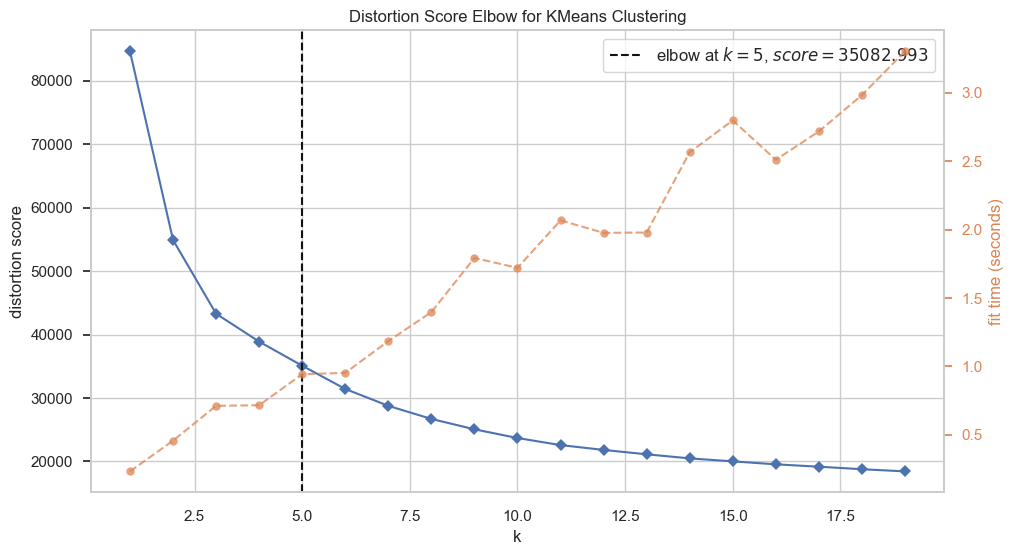

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 20))
visualizer.fit(normalized_knn_features)
visualizer.show()

#### The Elbow method seems to think 5 clusters would be appropriate. However, with the dataset of 170,000 songs, if we sample randomly from the clusters to get recommendations, we'd be effectively randomly sampling. 

#### We'll try to do 50 clusters, then sample recommendations from songs in the same cluster as the query, and show their distance. Note that the recommendations randomized within the query's assigned cluster.

In [19]:
import numpy as np
from scipy.spatial.distance import euclidean, cityblock
num_clusters = 50

# create and fit a K-Means model
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(normalized_knn_features)

# assign each song to a cluster
data_with_clusters = data.copy()
data_with_clusters['cluster'] = clusters

def recommend_songs(song_index: int, df: pd.DataFrame, features: np.ndarray, n_songs: int = 5):
    song_cluster = df.iloc[song_index]['cluster']
    
    # filter songs that are in the same cluster
    same_cluster_songs: pd.DataFrame = df[df['cluster'] == song_cluster]

    # recommend n_songs from the same cluster
    recommended_songs = same_cluster_songs.sample(n_songs + 1)  # +1 includes the query song itself
    
    # euclidean and manhattan distances
    query_features = features[song_index]
    recommended_songs['euclidean_distance'] = recommended_songs.apply(
        lambda row: euclidean(query_features, features[row.name]), axis=1)
    recommended_songs['manhattan_distance'] = recommended_songs.apply(
        lambda row: cityblock(query_features, features[row.name]), axis=1)

    # remove query from recommendations
    return recommended_songs[recommended_songs.index != song_index]

query_index = 19742
similar_songs = recommend_songs(query_index, data_with_clusters, normalized_knn_features)
print('Similar song recommendations using KMeans with 30 clusters:')
print(f'{"Index":<6} {"Song Name":<40} {"Artist":<30} {"Euclidean":<15} {"Manhattan":<15}')
print('-' * 106)

# query song details
query_song = data_with_clusters.iloc[query_index]
query_song_name = query_song['name']
query_artist = ast.literal_eval(query_song['artists'])[0]
print(f'Query: {query_song_name:<40} by {query_artist}')

# print the recommended songs
for idx, song in similar_songs.iterrows():
    song_name = song['name']
    artist = ast.literal_eval(song['artists'])[0]  # Assuming artists are in list format as strings
    euclidean_dist = song['euclidean_distance']
    manhattan_dist = song['manhattan_distance']
    print(f'{idx:<6} {song_name:<40} {artist:<30} {euclidean_dist:<15.4f} {manhattan_dist:<15.4f}')



Similar song recommendations using KMeans with 30 clusters:
Index  Song Name                                Artist                         Euclidean       Manhattan      
----------------------------------------------------------------------------------------------------------
Query: Lovesick Girls                           by BLACKPINK
116754 Heart Of Glass - 12" Version             Blondie                        0.2697          0.5387         
9492   Jumpin' Jack Flash - Mono Version        The Rolling Stones             0.3469          0.8330         
151959 Die Born                                 Days Of The New                0.1957          0.4404         
33570  Pies Descalzos, Sueños Blancos           Shakira                        0.2997          0.5887         
50477  The Wild And The Young                   Quiet Riot                     0.2830          0.6374         
10781  There Goes Another Love Song             The Outlaws                    0.3316          0.5868     

#### <br>Finally, let's compare performance of the custom KNN classifiers using just-in-time compilation, CUDA code, and the vanilla CPU implementation.

In [20]:
import time
from models.gpu_kneighbors import GpuKNeighbors
from models.distance_metric import DistanceMetric

# initialize classifiers: CPU-based with and without JIT, and GPU-based
dist_metric = DistanceMetric.EUCLIDEAN
my_knn_no_jit = MyKNeighborsClassifier(k=7, dist_metric=dist_metric, jit_compilation=False)
my_knn_jit = MyKNeighborsClassifier(k=7, dist_metric=dist_metric, jit_compilation=True)
my_knn_gpu = GpuKNeighbors(k=7, dist_metric=dist_metric)

# fit all classifiers with the same data
my_knn_no_jit.fit(normalized_knn_features)
my_knn_jit.fit(normalized_knn_features)
my_knn_gpu.fit(normalized_knn_features)

# test the CPU classifier without JIT
query_index = 9
start_time = time.time()
my_knn_no_jit_distances, my_knn_no_jit_indices = my_knn_no_jit.predict(query=normalized_knn_features[query_index])
end_time = time.time()
no_jit_time = end_time - start_time
print(f"Time taken without JIT: {no_jit_time} seconds")

# test the CPU classifier with JIT
start_time = time.time()
my_knn_jit_distances, my_knn_jit_indices = my_knn_jit.predict(query=normalized_knn_features[query_index])
end_time = time.time()
jit_time = end_time - start_time
print(f"Time taken with JIT: {jit_time} seconds")

# test the GPU classifier w/ compilation
start_time = time.time()
my_knn_gpu_distances, my_knn_gpu_indices = my_knn_gpu.predict(query=normalized_knn_features[query_index])
end_time = time.time()
gpu_time = end_time - start_time
print(f"Time taken with GPU (1st run, includes 1st time compilation): {gpu_time} seconds")

# test the GPU classifier after it's been compiled once now
start_time = time.time()
my_knn_gpu_distances, my_knn_gpu_indices = my_knn_gpu.predict(query=normalized_knn_features[query_index])
end_time = time.time()
gpu_time = end_time - start_time
print(f"Time taken with GPU (2nd run, already been compiled): {gpu_time} seconds")

Time taken without JIT: 0.7940902709960938 seconds
Time taken with JIT: 0.12050199508666992 seconds
Time taken with GPU (1st run, includes 1st time compilation): 0.12451410293579102 seconds
Time taken with GPU (2nd run, already been compiled): 0.01999974250793457 seconds
